# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_conv2d_lstm'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        # tf.keras.layers.Permute((2, 1), input_shape=(1000, 102)),
        # tf.keras.layers.Conv1D(filters=16,kernel_size=4,strides=4,activation='relu')
        # tf.keras.layers.Reshape((-1,400,), input_shape=(None,None,25,16)),
        # 
        tf.keras.layers.Reshape(target_shape=(1000,102,1),input_shape=(1000,102)),

        tf.keras.layers.Conv2D(filters=64, kernel_size=(20, 2),strides=2,input_shape=( 1000, 102,1),padding='valid'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(20, 2),strides=2,padding='valid'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
        tf.keras.layers.Reshape(target_shape=(56,6*32)),
        tf.keras.layers.Dropout(rate=0.3),


        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 5
epochs_per_bag = 200
start_from_bag = 0


## Training with Boosting

Training bag 0
[1. 1. 1. ... 1. 1. 1.]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1000, 102, 1)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 491, 51, 64)       2624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 245, 25, 64)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 245, 25, 64)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 113, 12, 32)       81952     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 6, 32)         0         
_________________________________________________________________
reshape_3 (Resh

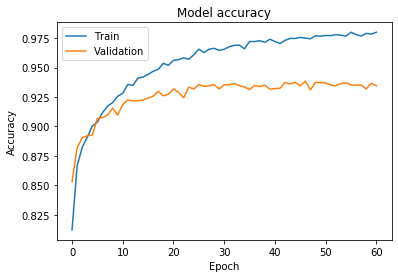

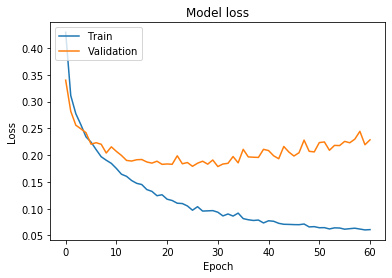

Training bag 1
(14930, 1)
(14930,)
[3.18288803e-05 1.57588720e-03 1.00593865e-02 ... 1.18115723e-01
 8.28927159e-02 1.64508820e-05]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 1)
(6051,)
Saved to result_boosting_conv2d_lstm_boost1.csv
[9.99972463e-01 9.99848843e-01 9.99312580e-01 ... 1.43408775e-04
 1.42931938e-04 1.42693520e-04]
Train on 10451 samples, validate on 3732 samples
Epoch 1/200
10451/10451 - 17s - loss: 0.4924 - accuracy: 0.7512 - auc_3: 0.8230 - val_loss: 0.3716 - val_accuracy: 0.8628 - val_auc_3: 0.9155
Epoch 2/200
10451/10451 - 14s - loss: 0.3787 - accuracy: 0.8176 - auc_3: 0.9002 - val_loss: 0.3152 - val_accuracy: 0.8829 - val_auc_3: 0.9374
Epoch 3/200
10451/10451 - 14s - loss: 0.3475 - accuracy: 0.8386 - auc_3: 0.9174 - val_loss: 0.2998 - val_accuracy: 0.8837 - val_auc_3: 0.9376
Epoch 4/200
10451/10451 - 14s - loss: 0.3288 - accuracy: 0.8465 - auc_3: 0.9262 - val_loss: 0.3020 - val_accuracy: 0.8909 - val_auc_3: 0.9443
Epoch 5/200
10451/10451 - 14s - loss: 0.3090 - accuracy: 0.8599 - auc_3: 0.9355 - val_loss: 0.2660 - val_accuracy: 0.9011 - val_auc_3: 0.9572
Epoch 6/200
10451/10451 - 14s - loss: 0.2935 - accuracy: 0.8716 - auc_3: 0.942

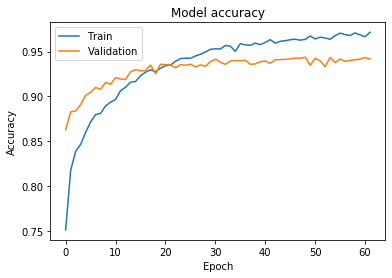

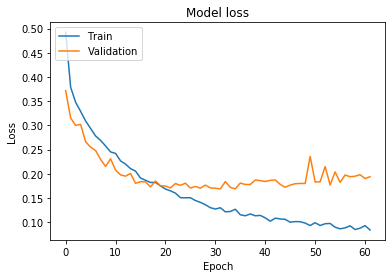

Training bag 2
(14930, 2)
(14930,)
[3.47375870e-04 1.51625276e-03 7.00409710e-03 ... 1.25237882e-01
 4.41711545e-02 1.15633011e-05]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 2)
(6051,)
Saved to result_boosting_conv2d_lstm_boost2.csv
[9.98504132e-01 9.98412877e-01 9.98390943e-01 ... 4.60565090e-04
 4.60505486e-04 4.60326672e-04]
Train on 10451 samples, validate on 3732 samples
Epoch 1/200
10451/10451 - 17s - loss: 0.4899 - accuracy: 0.7606 - auc_5: 0.8423 - val_loss: 0.3758 - val_accuracy: 0.8647 - val_auc_5: 0.9173
Epoch 2/200
10451/10451 - 14s - loss: 0.4018 - accuracy: 0.8135 - auc_5: 0.8980 - val_loss: 0.3216 - val_accuracy: 0.8824 - val_auc_5: 0.9351
Epoch 3/200
10451/10451 - 14s - loss: 0.3625 - accuracy: 0.8354 - auc_5: 0.9182 - val_loss: 0.2911 - val_accuracy: 0.8826 - val_auc_5: 0.9503
Epoch 4/200
10451/10451 - 14s - loss: 0.3328 - accuracy: 0.8527 - auc_5: 0.9317 - val_loss: 0.2633 - val_accuracy: 0.8992 - val_auc_5: 0.9571
Epoch 5/200
10451/10451 - 14s - loss: 0.3128 - accuracy: 0.8616 - auc_5: 0.9399 - val_loss: 0.2406 - val_accuracy: 0.8998 - val_auc_5: 0.9635
Epoch 6/200
10451/10451 - 14s - loss: 0.2942 - accuracy: 0.8743 - auc_5: 0.947

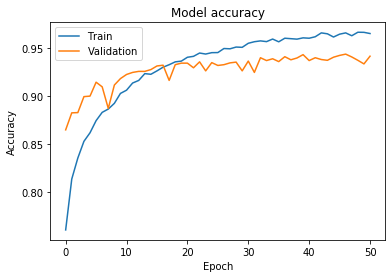

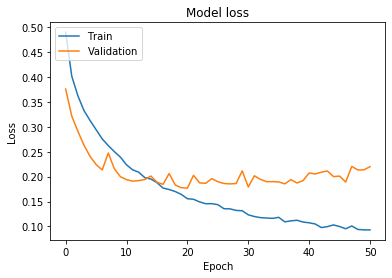

Training bag 3
(14930, 3)
(14930,)
[3.46362591e-04 2.26999330e-03 1.04495091e-02 ... 1.30008981e-01
 4.77926135e-02 4.62532043e-05]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 3)
(6051,)
Saved to result_boosting_conv2d_lstm_boost3.csv
[0.99770167 0.99762664 0.99753234 ... 0.00140733 0.00140691 0.00140669]
Train on 10451 samples, validate on 3732 samples
Epoch 1/200
10451/10451 - 17s - loss: 0.4787 - accuracy: 0.7634 - auc_7: 0.8398 - val_loss: 0.3819 - val_accuracy: 0.8374 - val_auc_7: 0.9185
Epoch 2/200
10451/10451 - 14s - loss: 0.3750 - accuracy: 0.8202 - auc_7: 0.9057 - val_loss: 0.3066 - val_accuracy: 0.8821 - val_auc_7: 0.9397
Epoch 3/200
10451/10451 - 14s - loss: 0.3401 - accuracy: 0.8416 - auc_7: 0.9230 - val_loss: 0.2861 - val_accuracy: 0.8757 - val_auc_7: 0.9476
Epoch 4/200
10451/10451 - 14s - loss: 0.3168 - accuracy: 0.8562 - auc_7: 0.9341 - val_loss: 0.2687 - val_accuracy: 0.8968 - val_auc_7: 0.9581
Epoch 5/200
10451/10451 - 14s - loss: 0.3004 - accuracy: 0.8648 - auc_7: 0.9407 - val_loss: 0.2457 - val_accuracy: 0.8971 - val_auc_7: 0.9605
Epoch 6/200
10451/10451 - 14s - loss: 0.2815 - accuracy: 0.8751 - auc_7: 0.9482 - val_loss: 0.2541 - va

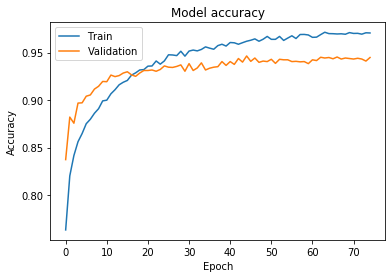

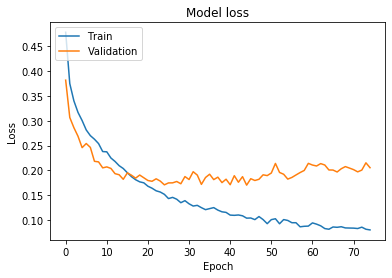

Training bag 4
(14930, 4)
(14930,)
[2.90632248e-04 2.06632167e-03 9.51147079e-03 ... 1.18876725e-01
 4.19927239e-02 3.49283218e-05]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 4)
(6051,)
Saved to result_boosting_conv2d_lstm_boost4.csv
[0.99790054 0.99784195 0.99774236 ... 0.00142344 0.00142312 0.00142304]
Train on 10451 samples, validate on 3732 samples
Epoch 1/200
10451/10451 - 19s - loss: 0.4857 - accuracy: 0.7584 - auc_9: 0.8363 - val_loss: 0.3698 - val_accuracy: 0.8424 - val_auc_9: 0.9221
Epoch 2/200
10451/10451 - 14s - loss: 0.3862 - accuracy: 0.8178 - auc_9: 0.8996 - val_loss: 0.3187 - val_accuracy: 0.8663 - val_auc_9: 0.9389
Epoch 3/200
10451/10451 - 14s - loss: 0.3455 - accuracy: 0.8418 - auc_9: 0.9212 - val_loss: 0.2813 - val_accuracy: 0.8872 - val_auc_9: 0.9517
Epoch 4/200
10451/10451 - 14s - loss: 0.3260 - accuracy: 0.8482 - auc_9: 0.9302 - val_loss: 0.2645 - val_accuracy: 0.8923 - val_auc_9: 0.9555
Epoch 5/200
10451/10451 - 14s - loss: 0.3022 - accuracy: 0.8614 - auc_9: 0.9405 - val_loss: 0.2570 - val_accuracy: 0.8944 - val_auc_9: 0.9582
Epoch 6/200
10451/10451 - 14s - loss: 0.2886 - accuracy: 0.8724 - auc_9: 0.9459 - val_loss: 0.2365 - va

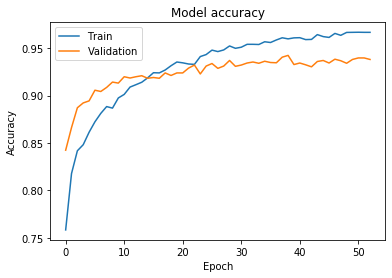

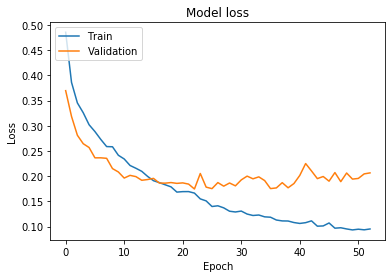

In [3]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*7
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    idx = (-training_loss).argsort()[:train_size]
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=30, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=32,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 5)
(6051,)




## Save Prediction to CSV

In [5]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_boosting_conv2d_lstm.csv
